In [11]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

from scripts import *

In [3]:
%store -r df_merged
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8499 entries, 2012-11-01 00:00:00 to 2021-02-28 21:00:00
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           8499 non-null   float64
 1   T_a         8499 non-null   float64
 2   Ff          8499 non-null   float64
 3   N           8491 non-null   float64
 4   Nh          6727 non-null   float64
 5   Cl          8499 non-null   int32  
 6   Po          8496 non-null   float64
 7   U           8488 non-null   float64
 8   Ch          3019 non-null   object 
 9   Cm          5181 non-null   object 
 10  H           6739 non-null   object 
 11  RRR         2141 non-null   object 
 12  DD_         8499 non-null   object 
 13  diff        8499 non-null   float64
 14  abs_diff    8499 non-null   float64
 15  T_kal       8488 non-null   float64
 16  T_sher      8494 non-null   float64
 17  T_sar       6675 non-null   float64
 18  three_mean  6666 non-null   floa

In [4]:
# try catboost reg
df_merged_c = df_merged.copy()

df_merged_c['Cl'] = df_merged_c['Ch'].fillna(0)
df_merged_c['Ch'] = df_merged_c['Ch'].fillna(0)
df_merged_c['Cm'] = df_merged_c['Ch'].fillna(0)
df_merged_c['H'] = df_merged_c['Ch'].fillna(0)
df_merged_c['RRR'] = df_merged_c['Ch'].fillna(0)

In [35]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_merged_c.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a']),df_merged_c['diff'], test_size=0.7, shuffle=True)

In [5]:
train_data = df_merged_c['2012':'2019-03']
train_data = train_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
eval_data = df_merged_c['2019-11':]
eval_data = eval_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
train_labels = df_merged_c['2012':'2019-03']['diff']

In [40]:
model = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=10,
                         l2_leaf_reg=5,
                         learning_rate=0.3)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

In [36]:
model = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=10,
                         l2_leaf_reg=5,
                         learning_rate=0.3)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model.fit(X_train,
          y_train,
          verbose=False,
         cat_features=cat_cols)

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(X_test))

0.7041225470206153

In [29]:
# for visualize
model_v3 = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=3,
                            max_ctr_complexity=1,
                            one_hot_max_size=15)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model_v3.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

In [8]:
# for visualize
model_v4 = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=4)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model_v4.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6652 entries, 2012-11-01 00:00:00 to 2019-02-28 21:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           6652 non-null   float64
 1   Ff          6652 non-null   float64
 2   N           6644 non-null   float64
 3   Nh          5188 non-null   float64
 4   Cl          6652 non-null   object 
 5   Po          6651 non-null   float64
 6   U           6645 non-null   float64
 7   Ch          6652 non-null   object 
 8   Cm          6652 non-null   object 
 9   H           6652 non-null   object 
 10  RRR         6652 non-null   object 
 11  DD_         6652 non-null   object 
 12  T_kal       6642 non-null   float64
 13  T_sher      6649 non-null   float64
 14  T_sar       4834 non-null   float64
 15  three_mean  4826 non-null   float64
dtypes: float64(10), object(6)
memory usage: 883.5+ KB


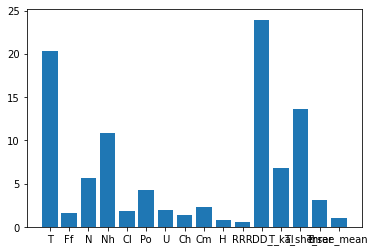

In [13]:
# plt.bar([0,1,2,3,4,5,6,7,8,9, 10, 11,12,13,14, 15], model.get_feature_importance())
plt.bar(train_data.columns.values.tolist(), model.get_feature_importance())
plt.show()

<BarContainer object of 16 artists>

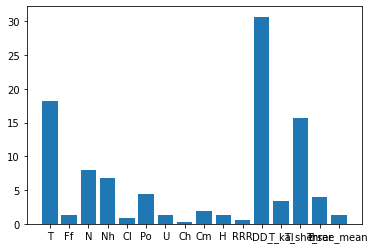

In [18]:
plt.bar(train_data.columns.values.tolist(), model_v3.get_feature_importance())

### Visualization of CatBoost decision trees
https://github.com/catboost/tutorials/blob/master/model_analysis/visualize_decision_trees_tutorial.ipynb

https://stackoverflow.com/questions/65634161/how-to-get-catboost-visualization-to-show-the-categories

In [13]:
is_cat = (train_data.dtypes != float)
cat_features_index = np.where(is_cat)[0]

pool = Pool(train_data, train_labels, cat_features=cat_features_index, feature_names=list(train_data.columns))

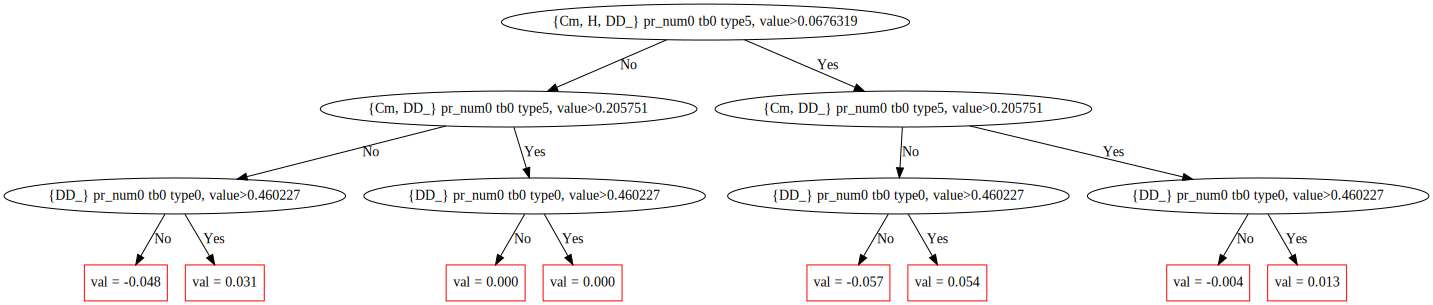

In [22]:
model_v3.plot_tree(tree_idx=0, pool=pool)

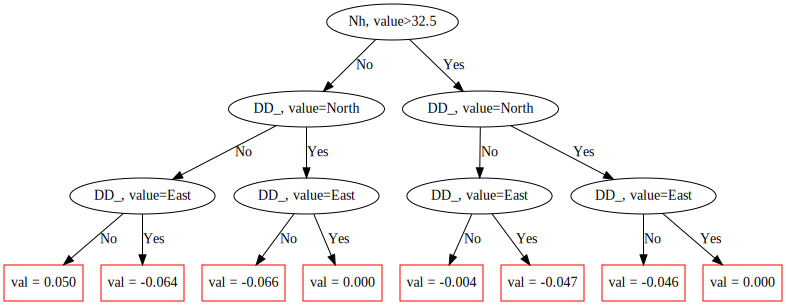

In [30]:
model_v3.plot_tree(tree_idx=0, pool=pool)

In [ ]:
model_v3.plot_tree(tree_idx=0, pool=pool)

### feature_statistics_tutorial

In [43]:
feature = 'DD_'
res = model_v3.calc_feature_statistics(train_data, train_labels, feature, plot=True)

In [47]:
shap_values = model.get_feature_importance(Pool(train_data, train_labels, cat_features=cat_cols), type='ShapValues')